<a href="https://colab.research.google.com/github/nerdstv/Stock_Price_Predictor/blob/main/Stockprice_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

In [ ]:
from google.colab import drive
drive.mount('Test')

Mounted at Test


In [ ]:
df_train = pd.read_csv('/content/Test/MyDrive/StockMarketPricePredictionModel/Google_Stock_Price_Train.csv')

In [ ]:
df_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
training_set = df_train.iloc[:,1:2].values

In [ ]:
training_set#.shape

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
sc

MinMaxScaler()

In [ ]:
train_scaled = sc.fit_transform(training_set)

In [ ]:
train_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
X_train = []
y_train = []
for i in range(60,1258):
    X_train.append(train_scaled[i-60:i,0])
    y_train.append(train_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [ ]:
X_train.shape

(1198, 60)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [ ]:
X_train


array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM

In [ ]:
reg = Sequential()

In [ ]:
reg.add(LSTM(units = 50, return_sequences= True, input_shape = (X_train.shape[1],1)))
reg.add(Dropout(0.2))
reg.add(LSTM(units = 50, return_sequences= True))
reg.add(Dropout(0.2))
reg.add(LSTM(units = 50, return_sequences= True))
reg.add(Dropout(0.2))
reg.add(LSTM(units = 50))
reg.add(Dropout(0.2))
reg.add(Dense(units=1))

In [ ]:
reg.compile(optimizer='adam', loss = 'mean_squared_error')

In [ ]:
reg.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 15s 181ms/step - loss: 0.0383
Epoch 2/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0067
Epoch 3/100
38/38 [==============================] - 6s 165ms/step - loss: 0.0056
Epoch 4/100
38/38 [==============================] - 6s 159ms/step - loss: 0.0054
Epoch 5/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0056
Epoch 6/100
38/38 [==============================] - 7s 176ms/step - loss: 0.0051
Epoch 7/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0044
Epoch 8/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0043
Epoch 9/100
38/38 [==============================] - 7s 180ms/step - loss: 0.0042
Epoch 10/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0049
Epoch 11/100
38/38 [==============================] - 5s 143ms/step - loss: 0.0048
Epoch 12/100
38/38 [==============================] - 6s 160ms/step - loss: 0.0038
Epoch 13/100

In [ ]:
df_test = pd.read_csv('/content/Test/MyDrive/StockMarketPricePredictionModel/Google_Stock_Price_Test.csv')

In [ ]:
df_test.head()
test_set = df_test.iloc[:,1:2].values

In [ ]:
df_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [ ]:
datat = pd.concat((df_train['Open'], df_test['Open']), axis=0)
datat

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [ ]:
inputs = datat[len(datat) - len(df_test) - 60 :].values
inputs = inputs.reshape(-1,1)
#inputs.shape
inputs = sc.fit_transform(inputs)
#inputs

In [ ]:
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [ ]:
pred = reg.predict(X_test)

1/1 [==============================] - 2s 2s/step


In [ ]:
pred

array([[0.4765535 ],
       [0.4489509 ],
       [0.4341378 ],
       [0.4350947 ],
       [0.46069816],
       [0.52212054],
       [0.59870183],
       [0.65098995],
       [0.67359066],
       [0.6769913 ],
       [0.67158085],
       [0.66274285],
       [0.6543248 ],
       [0.65308523],
       [0.65947115],
       [0.70157415],
       [0.78020823],
       [0.87481153],
       [0.93134046],
       [0.89738846]], dtype=float32)

In [ ]:
prediction = sc.inverse_transform(pred)

In [ ]:
prediction

array([[789.01434],
       [786.44116],
       [785.06036],
       [785.14954],
       [787.53625],
       [793.262  ],
       [800.401  ],
       [805.2753 ],
       [807.3821 ],
       [807.6991 ],
       [807.19476],
       [806.3709 ],
       [805.5862 ],
       [805.47064],
       [806.0659 ],
       [809.9907 ],
       [817.321  ],
       [826.13995],
       [831.4096 ],
       [828.2445 ]], dtype=float32)

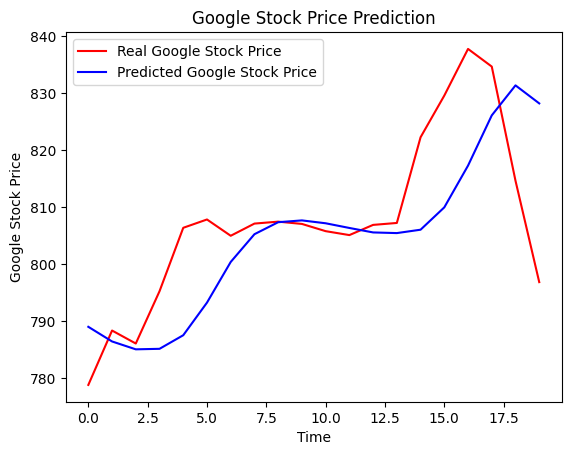

In [ ]:
plt.plot(test_set, color = 'red', label = 'Real Google Stock Price')
plt.plot(prediction, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()